In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Task

In a <b>new notebook</b>, use transfer learning to solve an image classification task on the [Cars vs Bikes](https://www.kaggle.com/datasets/utkarshsaxenadn/car-vs-bike-classification-dataset) dataset. Please follow the same pipeline we did in this lab (you may copy-paste and reuse codeblocks). You will be graded on the following:

* [3 pt] <b>Dataset:</b>
  * **[1pt]** Downloading and extracting dataset correctly.

  * **[1pt]** Displaying a list of class labels, and visualizing 25 random sample images with their class labels. 

  *  **[1pt]**loading the image data from a generator with the correct preprocessing parameters. 


* [3 pt] <b>Model:</b>
  * **[1pt]** Choosing and downloading a base model other than the one used in this lab. 
  * **[1pt]** Freezing an appropriate number of layers based on the criteria explained in this lab. 

  * **[1pt]** Choosing an appropriate optimizer, loss function, and hyperparameters (such as learning rate). 

* [1 pt] <b>Training:</b>

  * **[0.5pt]** Learning curves are shown with proper labels for axes and plots. Learning curves show the training and valdiation losses on one graph, and the training and valdiation accuracies on another graph.
  * **[0.5pt]** Learning curves do not show signs of overfitting or underfitting.

* [3 pt] <b>Evaluation:</b>
  * **[2pt]** Test accuracy.
  * **[1pt]** Confusion matrix is displayed (visualized).


<b>Tips & Hints:</b>
  * Do not forget to use the appropriate preprocessing function corresponding to your chosen pre-trained network.

  * the dataset has the train, test and validation sets in separate folders, so create a seperate generator for each with no validation split.
  
  * Use `sklearn.metrics.confusion_matrix` to print the confusion matrix. Be careful that you need to set `shuffle = False` in the test data generator. This is to make sure that the test set will be generated in the same order every time.

# libraries

In [2]:
import os 
import keras
import numpy as np 
import pandas as pd
import tensorflow as tf
from IPython.display import clear_output as cls

# Data 
from keras.preprocessing.image import ImageDataGenerator

# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt

# Model 
from keras.models import Sequential, load_model
from keras.layers import GlobalAvgPool2D as GAP, Dense, Dropout

# Callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint


# Dataset:

In [3]:
# import os
# import random 
# from glob import glob
# from pathlib import Path
# DATASET_DIR = os.path.join("/content", "cat_and_dog")
# TRAIN_DIR = os.path.join(DATASET_DIR, "training_set", "training_set")
# TEST_DIR = os.path.join(DATASET_DIR, "test_set", "test_set")

# all_data = [y for x in os.walk(DATASET_DIR) for y in glob(os.path.join(x[0], '*jpg'))]
# all_labels = [os.path.basename(os.path.dirname(x)) for x in all_data]
# print(len(all_data))
# all_data[:10]

## Downloading and extracting dataset correctly.

In [4]:
# Class Names
root_path = '../input/car-vs-bike-classification-dataset/Car-Bike-Dataset/'
DATASET_DIR=root_path

# root_path='/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset'
class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)

# Class Distribution
class_dis = [len(os.listdir(root_path + name)) for name in class_names]


# Show
print(f"Total Number of Classes : {n_classes} \nClass Names : {class_names}")

Total Number of Classes : 2 
Class Names : ['Bike', 'Car']


In [5]:
import os
import random 
from glob import glob
from pathlib import Path
# DATASET_DIR = os.path.join("/content", "cat_and_dog")
# TRAIN_DIR = os.path.join(DATASET_DIR, "training_set", "training_set")
# TEST_DIR = os.path.join(DATASET_DIR, "test_set", "test_set")
# all_data = [y for x in os.walk(DATASET_DIR) for y in glob(os.path.join(x[0], '*jpg')) for y in glob(os.path.join(x[0], '*jpeg')) for y in glob(os.path.join(x[0], '*png'))]

all_data =[]
for x in os.walk(DATASET_DIR):
    for i in glob(os.path.join(x[0], '*jpg')):
        all_data.append(i)
    for j in glob(os.path.join(x[0], '*jpeg')):
        all_data.append(j)
    for k in glob(os.path.join(x[0], '*png')):
        all_data.append(k)

    

all_labels = [os.path.basename(os.path.dirname(x)) for x in all_data]
print(len(all_data))
all_data[:10]

3996


['../input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (2).jpg',
 '../input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (23).jpg',
 '../input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (43).jpg',
 '../input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (26).jpg',
 '../input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (11).jpg',
 '../input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (46).jpg',
 '../input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (45).jpg',
 '../input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (28).jpg',
 '../input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (17).jpg',
 '../input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car/Car (52).jpg']

In [6]:
# os.mkdir('training_set')
# os.mkdir('test_set')

In [7]:
# root='../input'

In [8]:
# sorted(os.listdir(root))

In [9]:
# import os
# import shutil

# images = [f for f in os.listdir() if '.jpg' in f.lower()]

# os.mkdir('training_set')
# os.mkdir('test_set')

# for image in images:
#     new_path = 'training_set/' + image
#     shutil.move(image, new_path)

In [10]:
# os.mkdir('/kaggle/working/training_set/')


In [11]:
# import os
# import shutil


# i=0
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
# #         print(os.path.join(dirname, filename))
#         new_path = '/kaggle/working/training_set'
#         shutil.copy(os.path.join(dirname, filename), new_path)
#         i+=1
#         if i>10:break

In [12]:
# import os
# import shutil


# i=0
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
# #         print(os.path.join(dirname, filename))
#         new_path = '/kaggle/working/test_set'
#         shutil.copy(os.path.join(dirname, filename), new_path)
#         i+=1
#         if i>10:break

In [13]:
# zz=[y for x in os.walk(DATASET_DIR) for y in glob(os.path.join(x[0], ''))]
# zz

In [14]:
# for i,x in enumerate(os.walk(DATASET_DIR)):
#     print("x[0]=",x[0])
#     print("x=",x[:])
#     if i>2:break

##  Displaying a list of class labels, and visualizing 25 random sample images with their class labels.

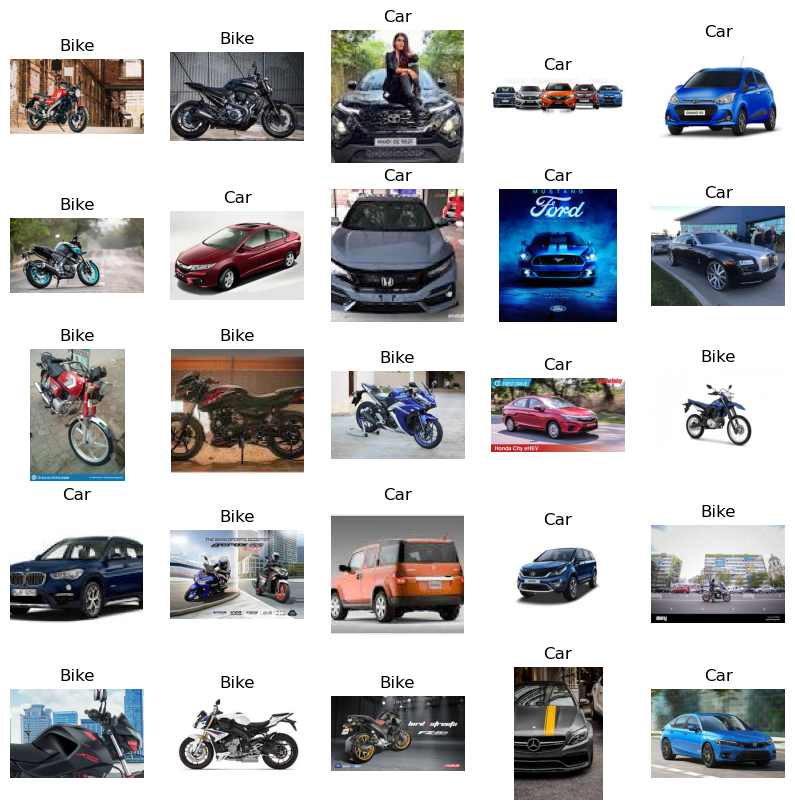

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Sample 25 images from dataset
indices = np.random.randint(0, len(all_data), size=25)
images = [all_data[i] for i in indices]
labels = [all_labels[i] for i in indices]

# Plot the 25 images
plt.figure(figsize=(10,10))
for i in range(len(indices)):
    plt.subplot(5, 5, i + 1)
    image = mpimg.imread(images[i]) # Read image from disk
    plt.imshow(image)
    plt.title(labels[i])
    plt.axis('off')
    
plt.show()

In [16]:
fig = px.pie(names=class_names, values=class_dis, title="Bike vs Car Class Distribution", hole=0.4)
fig.update_layout({'title':{'x':0.5}})
fig.show()

## loading the image data from a generator with the correct preprocessing parameters.

In [19]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.model_selection import train_test_split

HEIGHT, WIDTH=256,256
BATCH_SIZE = 64
VAL_SPLIT = 0.2

# TRAIN_DIR='/kaggle/working/training_set'
# TEST_DIR=root_path
# TEST_DIR='/kaggle/working/test_set'
# TRAIN_DIR, TEST_DIR=train_test_split(all_data, train_size=.8, shuffle=True, random_state=123) 


In [20]:
# TRAIN_DIR

In [21]:
# 1. Construct an instance of the `ImageDataGenerator` class
train_datagen =  ImageDataGenerator(
      preprocessing_function = tf.keras.applications.resnet50.preprocess_input,
      width_shift_range=0.1,
      height_shift_range=0.1,
      rotation_range=20,
      validation_split = VAL_SPLIT
    )

# 2. Retrieve the iterator
train_generator = train_datagen.flow_from_directory(root_path, 
                                                    shuffle = True,
                                                    seed = 7,
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    subset='training')

Found 3200 images belonging to 2 classes.


In [22]:
test_datagen = train_datagen.flow_from_directory(
    root_path,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    shuffle = True,
    seed = 7,
    color_mode='rgb',
    class_mode='categorical',
    subset='validation')

Found 800 images belonging to 2 classes.


In [23]:
# # Do the same steps for the test set

# # 1. Construct an instance of the `ImageDataGenerator` class
# test_datagen =  ImageDataGenerator(
#     preprocessing_function = tf.keras.applications.resnet50.preprocess_input
#     )

# # 2. Retrieve the iterator
# test_generator = test_datagen.flow_from_directory(TEST_DIR, 
#                                                     target_size=(HEIGHT, WIDTH), 
#                                                     batch_size=BATCH_SIZE,
#                                                     color_mode='rgb',
#                                                     class_mode='categorical')

In [24]:
# train_gen = ImageDataGenerator(rescale=1/255., rotation_range=10, validation_split=0.1)

# # Load Data
# train_ds = train_gen.flow_from_directory(root_path, class_mode='binary', target_size=(256,256), shuffle=True, batch_size=32, subset='training')
# valid_ds = train_gen.flow_from_directory(root_path, class_mode='binary', target_size=(256,256), shuffle=True, batch_size=32, subset='validation') 

In [25]:
# # Do the same steps for the test set


# # 1. Construct an instance of the `ImageDataGenerator` class
# test_datagen =  ImageDataGenerator(
#     preprocessing_function = tf.keras.applications.resnet50.preprocess_input
#     )

# # 2. Retrieve the iterator
# test_generator = test_datagen.flow_from_directory(root_path, 
#                                                     target_size=(HEIGHT, WIDTH), 
#                                                     batch_size=BATCH_SIZE,
#                                                     color_mode='rgb',
#                                                     class_mode='categorical')

# Model:

## Choosing and downloading a base model other than the one used in this lab.

In [26]:
# from keras.applications.resnet50 import RESNET50
from keras.applications import ResNet50 ,InceptionResNetV2	,VGG19
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout

# Load model without classification head
base_model = ResNet50(include_top = False,
                   weights = 'imagenet',
                   input_shape = (HEIGHT, WIDTH, 3))

# Print base model summary
base_model.summary()

# Mark loaded layers as not trainable
for layer in base_model.layers:
  layer.trainable = False

# You can choose to fine-tune some of the final layers:
for layer in base_model.layers[:-5]:
 layer.trainable = False

# You can pick which layers are trainable and which are not:
# base_model.get_layer('block1_conv1').trainable = False


# Add new classifier layers
x = Flatten()(base_model.layers[-1].output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
output = Dense(2, activation='softmax')(x)

# Define new model
model = Model(inputs = base_model.inputs, outputs = output)

# Print summary
model.summary()

# Compile
base_learning_rate = 0.0001
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = base_learning_rate),
            loss = 'binary_crossentropy',
            metrics = ['accuracy'])

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

## Freezing an appropriate number of layers based on the criteria explained in this lab.

## Choosing an appropriate optimizer, loss function, and hyperparameters (such as learning rate).

#  Training:

In [27]:
import tensorflow as tf

INITIAL_EPOCHS = 5

history = model.fit(train_generator,
                    validation_data = test_datagen,
                    epochs = INITIAL_EPOCHS)

Epoch 1/5
36/50 [====================>.........] - ETA: 18s - loss: 9.0676 - accuracy: 0.9128

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:980: UserWarning:

Palette images with Transparency expressed in bytes should be converted to RGBA images



50/50 [==============================] - 97s 2s/step - loss: 6.6198 - accuracy: 0.9337 - val_loss: 0.3441 - val_accuracy: 0.9837
Epoch 2/5
50/50 [==============================] - 74s 1s/step - loss: 0.3264 - accuracy: 0.9881 - val_loss: 0.8518 - val_accuracy: 0.9688
Epoch 3/5
50/50 [==============================] - 76s 2s/step - loss: 0.6031 - accuracy: 0.9834 - val_loss: 0.2318 - val_accuracy: 0.9875
Epoch 4/5
50/50 [==============================] - 75s 2s/step - loss: 0.2541 - accuracy: 0.9900 - val_loss: 0.5426 - val_accuracy: 0.9837
Epoch 5/5
50/50 [==============================] - 77s 2s/step - loss: 0.2691 - accuracy: 0.9906 - val_loss: 0.2362 - val_accuracy: 0.9862


## Learning curves are shown with proper labels for axes and plots. Learning curves show the training and valdiation losses on one graph, and the training and valdiation accuracies on another graph.

## Learning curves do not show signs of overfitting or underfitting.

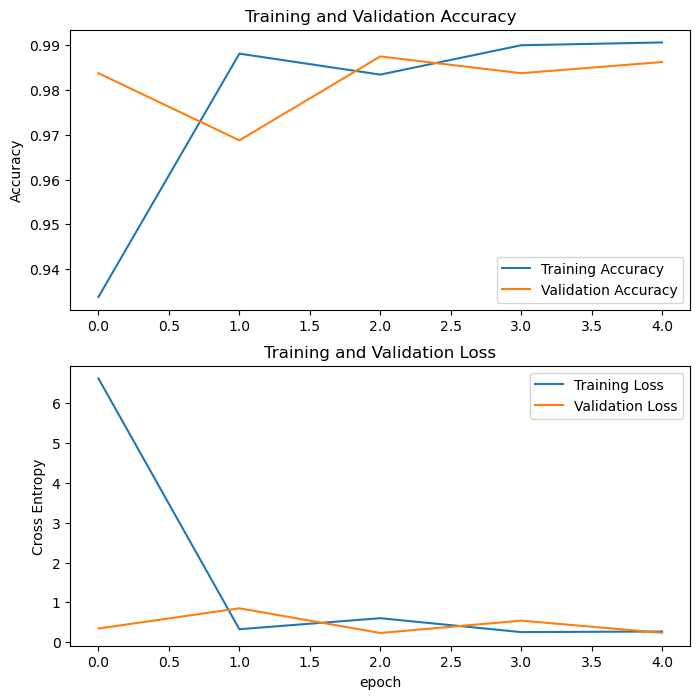

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Evaluation:

In [30]:
evaluation_prediction=model.evaluate(test_datagen)

13/13 [==============================] - 15s 1s/step - loss: 0.2925 - accuracy: 0.9900


In [42]:
preds = model.predict(test_datagen)


11/13 [========================>.....] - ETA: 2s

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:980: UserWarning:

Palette images with Transparency expressed in bytes should be converted to RGBA images



13/13 [==============================] - 14s 1s/step


In [32]:
preds

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [43]:
thresh = 0.5
pred_classes = [1 if p[1] >= thresh else 0 for p in preds]

## Test accuracy.

In [34]:
print('Test Accuracy of model: {}'.format(evaluation_prediction[1]))

Test Accuracy of model: 0.9900000095367432


## Confusion matrix is displayed (visualized).

<AxesSubplot:>

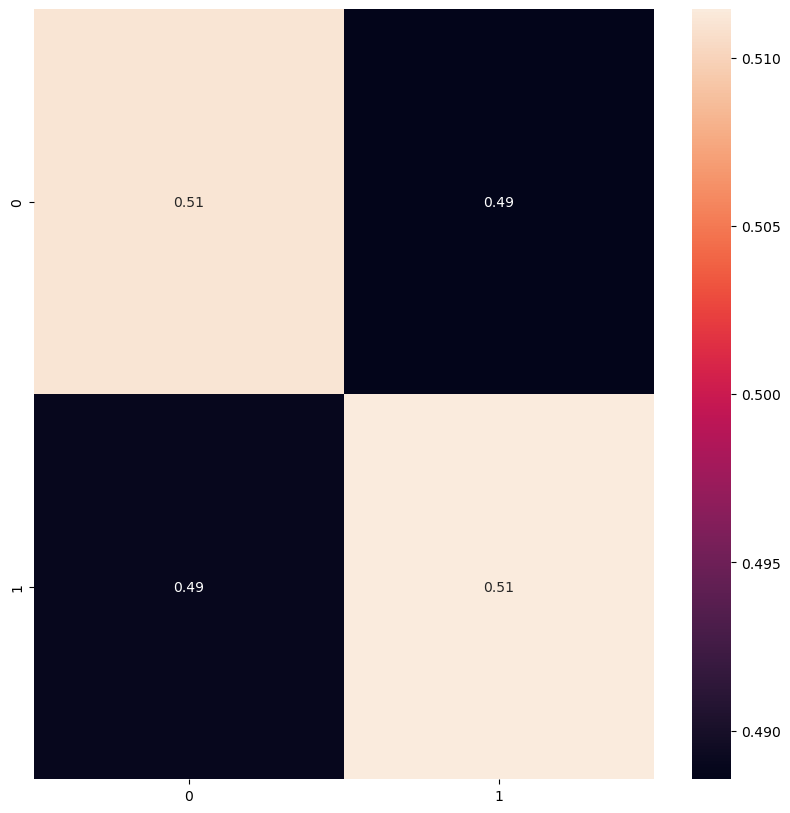

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as ssn
cm = confusion_matrix(test_datagen.labels, pred_classes, normalize='pred')
plt.figure(figsize = (10, 10))
ssn.heatmap(cm, annot = True)

# Bonus

Save your fine-tuned model as H5 format into colab local space, and load it again for testing.

In [45]:
working_dir=r'./'
name='bike or car classification model'
save_id=f'{name}.h5'
model_save_loc=os.path.join(working_dir, save_id)
model.save(model_save_loc)